<a href="https://colab.research.google.com/github/Arun613kumar/project/blob/main/Forest_Fires_in_Brazil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brazil Forest Fire Analysis**

**importing module**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

**Loding the Dataset**

In [4]:
with open("/content/amazon.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

In [5]:
df = pd.read_csv("/content/amazon.csv", encoding=encoding)
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1/1/1998
1,1999,Acre,Janeiro,0.0,1/1/1999
2,2000,Acre,Janeiro,0.0,1/1/2000
3,2001,Acre,Janeiro,0.0,1/1/2001
4,2002,Acre,Janeiro,0.0,1/1/2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,1/1/2012
6450,2013,Tocantins,Dezembro,85.0,1/1/2013
6451,2014,Tocantins,Dezembro,223.0,1/1/2014
6452,2015,Tocantins,Dezembro,373.0,1/1/2015


**check the missing value in the datast**

In [6]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

**check the datatype each columns**

In [7]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

**To change datatype of date from object to datatime**

In [8]:
df['date']=df['date'].astype("datetime64")

**Again check datatype in date column**

In [9]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

**1.Display top 5 Rows of the Dataset**

In [10]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**2.check Last 5 Rows of the Dataset**

In [11]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


**3.find shape of our Datadet (Number of Rows and Number of Columns)**

In [12]:
df.shape

(6454, 5)

In [13]:
print("Number of Rows=",df.shape[0])
print("Number of Column=",df.shape[1])

Number of Rows= 6454
Number of Column= 5


**4.Getting information About our Dataset Like Total Number Rows,Total Number of Columns,Datatypes of Each Column And Memory Requirement**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


**5.Check For Duplicate Data and Drop Then**

In [15]:
df.duplicated().sum()

32

**drop duplicate**

In [16]:
df.drop_duplicates(inplace=True)

**again check duplicate**

In [17]:
df.duplicated().sum()

0

**6.Check Null Values in The Dataset**

In [18]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

**7.Get Overall Statistics About The DataFrame**

In [19]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


**8.Rename Month Name to English**

In [20]:
df['month']

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6422, dtype: object

In [21]:
df['month_new']=df['month'].map({'Janeiro':'jan',
                  'Fevereiro':'feb',
                 'Março':'march',
                 'Abril':'april',
                 'Maio':'may',
                 'Junho':'june',
                 'Julho':'july',
                 'Agosto':'August',
                 'Setembro':'sep',
                 'Outubro':'oct',
                 'Novembro':'nov',
                 'Dezembro':'dec' })

In [22]:
df['month_new']

0       jan
1       jan
2       jan
3       jan
4       jan
       ... 
6449    dec
6450    dec
6451    dec
6452    dec
6453    dec
Name: month_new, Length: 6422, dtype: object

In [23]:
df.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


**9.Total Number of Fires Registered**

In [24]:
df.shape
print('Number of Fires Registered=',df.shape[0])

Number of Fires Registered= 6422


**10.In which month maximum number of forest fire were reported**

In [25]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [26]:
df1=df.groupby('month_new')['number'].sum().sort_values(ascending=False).reset_index()
df1

,month_new,number
0,july,92319.113
1,oct,88681.579
2,August,88050.435
3,nov,85508.054
4,sep,58578.305
5,dec,57535.480
6,june,55997.675
7,jan,47681.844
8,may,34725.363
9,feb,30839.050


<Axes: xlabel='month_new', ylabel='number'>

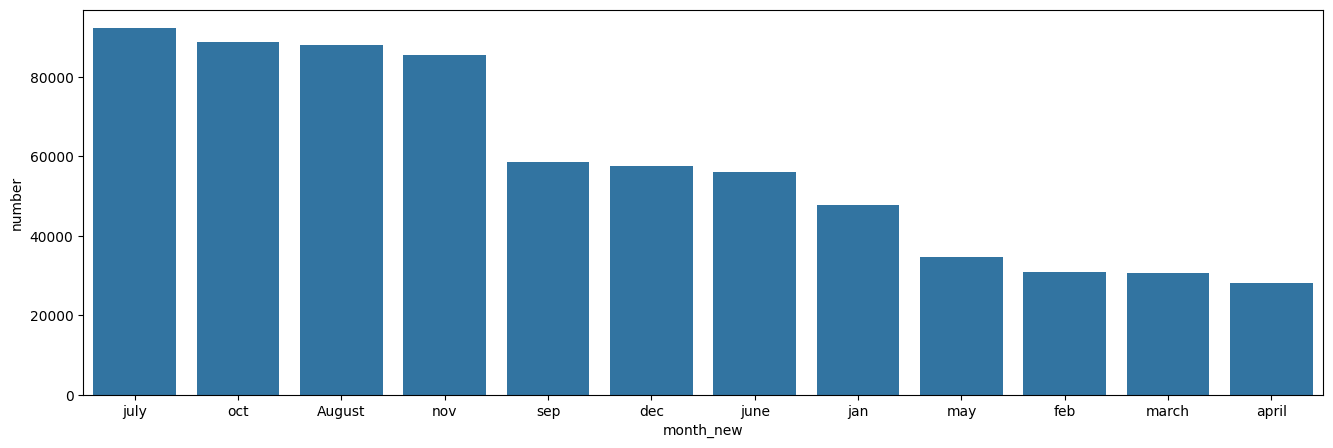

In [27]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=df1)

**11.in which year maximum number of forest fires were reported**

In [28]:
df2=df.groupby('year')['number'].sum().sort_values(ascending=False).reset_index()
df2

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39116.178
6,2004,38450.163
7,2002,37390.600
8,2010,37037.449
9,2017,36619.624


<Axes: xlabel='year', ylabel='number'>

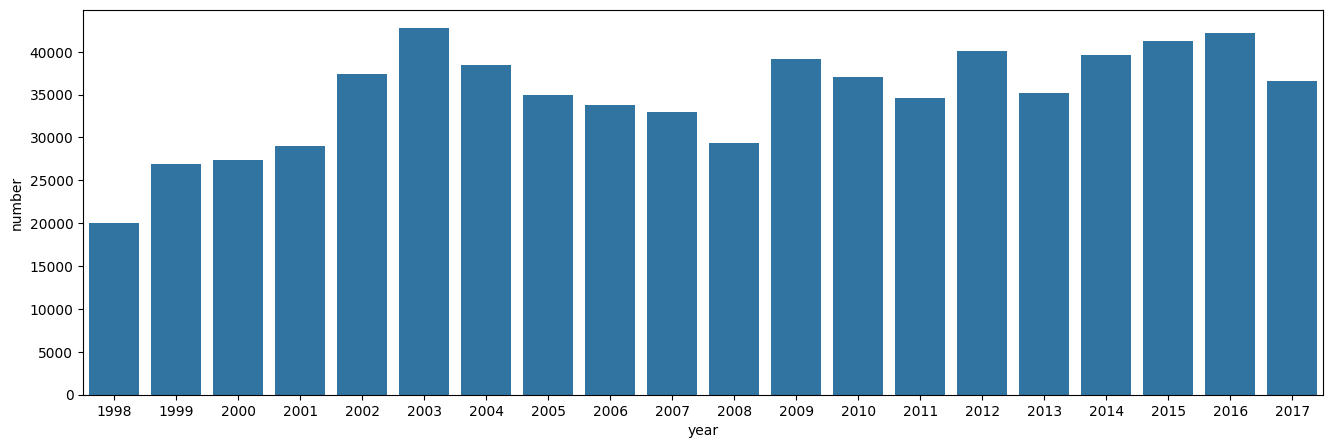

In [29]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=df2)

**12.In which state maximum number of forest fires were reported**

In [30]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [31]:
df3=df.groupby('state')['number'].sum().sort_values(ascending=False).reset_index()
df3

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


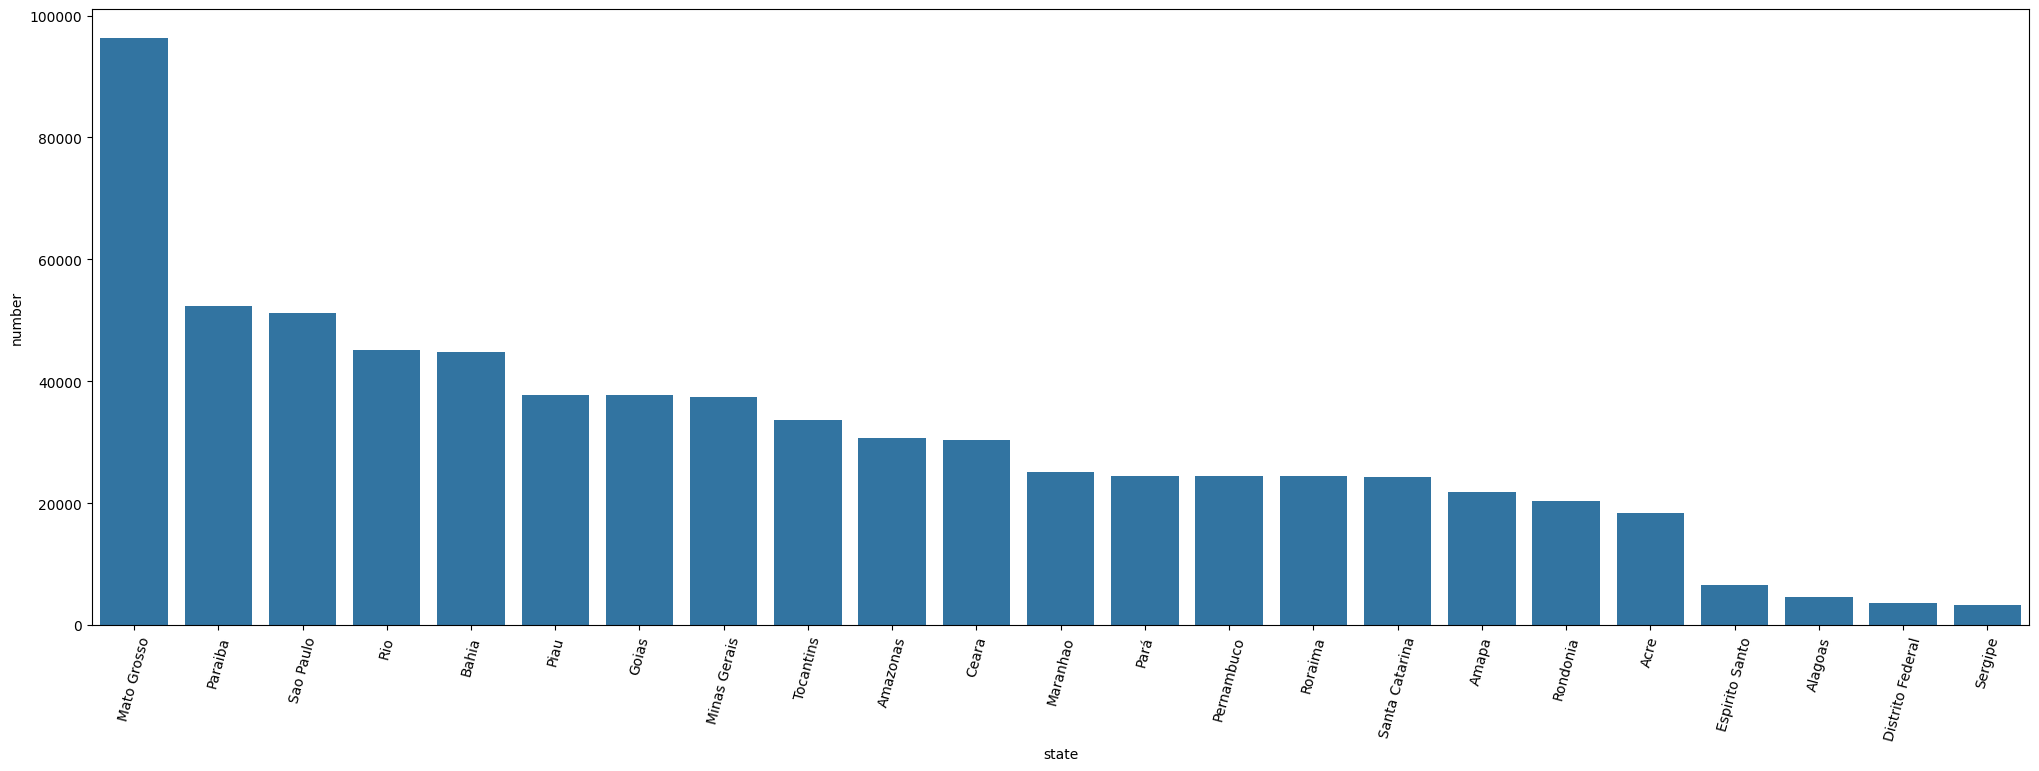

In [32]:
plt.figure(figsize=(25,8))
sns.barplot(x='state',y='number',data=df3)
plt.xticks(rotation=75)
plt.show()

**13.find total number of fires were reported in amazonas**

In [33]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [34]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

**14.Display Number of fires were reported in amazonas (year wise)**

In [35]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [36]:
df4=df[df['state']=="Amazonas"]
df5=df4.groupby('year')['number'].sum().reset_index()
df5


,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

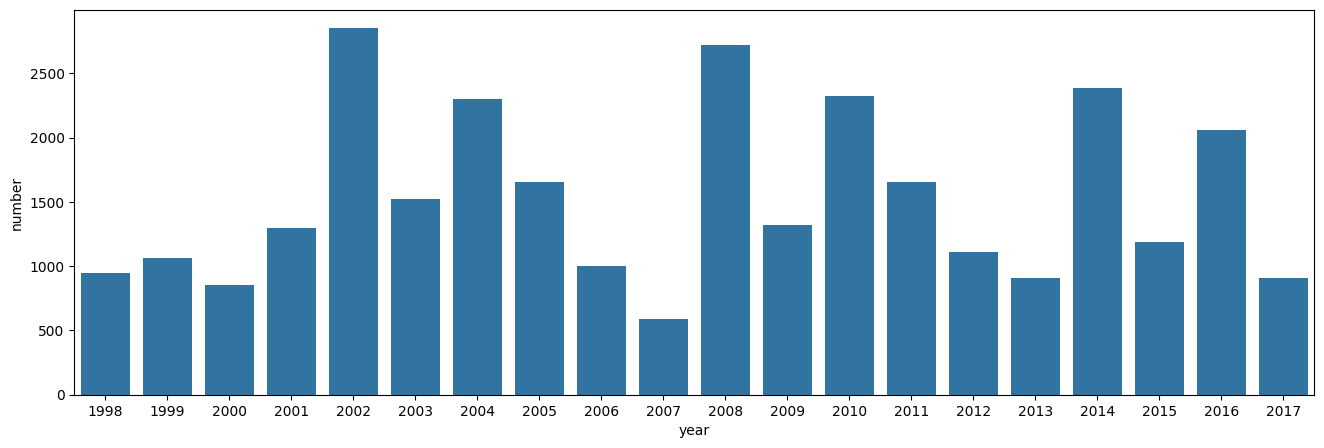

In [38]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=df5)

**15.Display number of fires were reported in amazonas(Day wise)**

**16.find total number of fires were reported in 2015 and visualize data based on each month**

In [50]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [57]:
fire=df[df['year']==2015].groupby('month_new')['number'].sum().reset_index()
fire

,month_new,number
0,August,4363.125
1,april,2573.000
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,june,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='month_new', ylabel='number'>

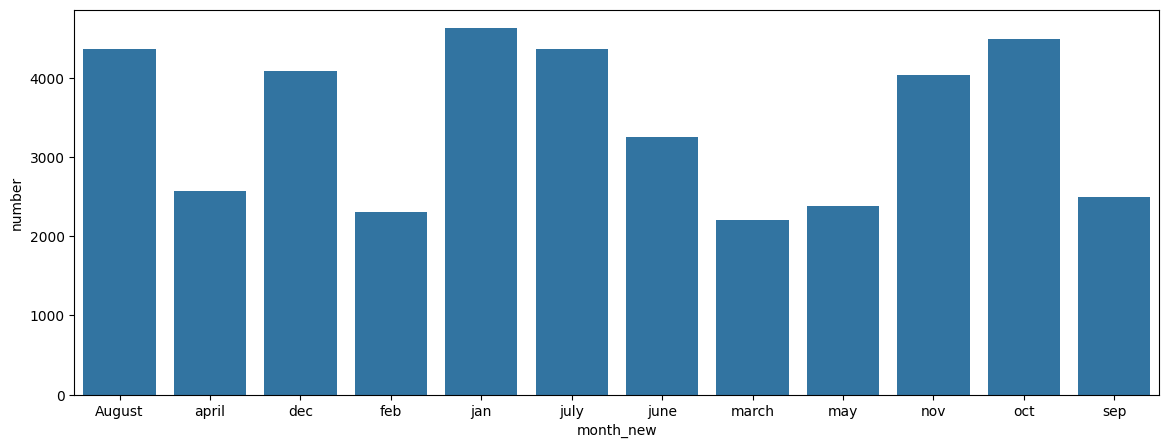

In [59]:
plt.figure(figsize=(14,5))
sns.barplot(x='month_new',y='number',data=fire)

**17.find average number of fires were reported from highest to lowest (state-wise)**

In [60]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [64]:
df8=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
df8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


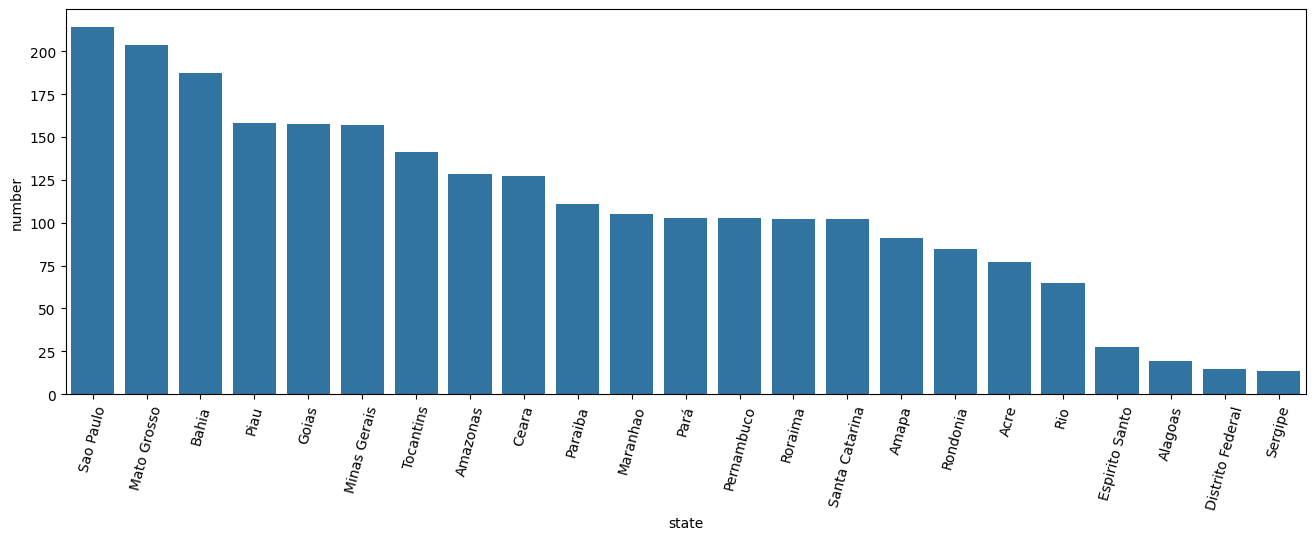

In [68]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=df8)
plt.xticks(rotation=75)
plt.show()

**18.To find the state numbers where fires were reported in 'dec'**

In [69]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [73]:
df[df['month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)